In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import xgboost
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/content/train.csv')
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
data.shape

(1460, 81)

In [4]:
data.isnull().sum().sum()

6965

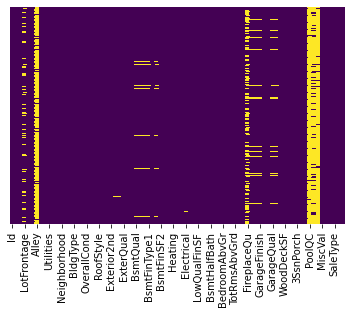

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

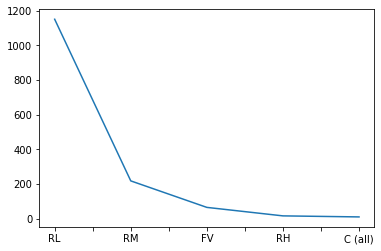

In [6]:
data.MSZoning.value_counts().plot()

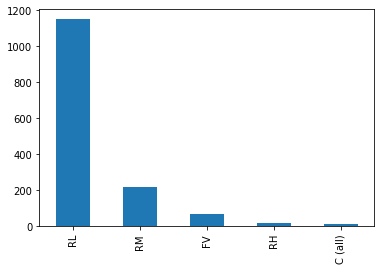

In [7]:
data.MSZoning.value_counts().plot.bar()

In [8]:
for i in data.columns[:]:
  print(i,':',len(data[i].unique()),'Labeles',)

Id : 1460 Labeles
MSSubClass : 15 Labeles
MSZoning : 5 Labeles
LotFrontage : 111 Labeles
LotArea : 1073 Labeles
Street : 2 Labeles
Alley : 3 Labeles
LotShape : 4 Labeles
LandContour : 4 Labeles
Utilities : 2 Labeles
LotConfig : 5 Labeles
LandSlope : 3 Labeles
Neighborhood : 25 Labeles
Condition1 : 9 Labeles
Condition2 : 8 Labeles
BldgType : 5 Labeles
HouseStyle : 8 Labeles
OverallQual : 10 Labeles
OverallCond : 9 Labeles
YearBuilt : 112 Labeles
YearRemodAdd : 61 Labeles
RoofStyle : 6 Labeles
RoofMatl : 8 Labeles
Exterior1st : 15 Labeles
Exterior2nd : 16 Labeles
MasVnrType : 5 Labeles
MasVnrArea : 328 Labeles
ExterQual : 4 Labeles
ExterCond : 5 Labeles
Foundation : 6 Labeles
BsmtQual : 5 Labeles
BsmtCond : 5 Labeles
BsmtExposure : 5 Labeles
BsmtFinType1 : 7 Labeles
BsmtFinSF1 : 637 Labeles
BsmtFinType2 : 7 Labeles
BsmtFinSF2 : 144 Labeles
BsmtUnfSF : 780 Labeles
TotalBsmtSF : 721 Labeles
Heating : 6 Labeles
HeatingQC : 5 Labeles
CentralAir : 2 Labeles
Electrical : 6 Labeles
1stFlrSF : 7

In [9]:
data.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

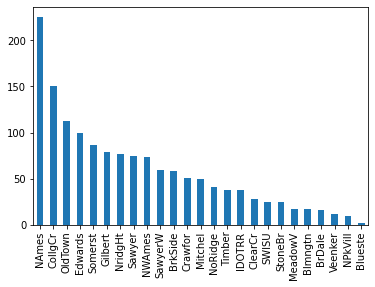

In [10]:
data['Neighborhood'].value_counts().plot.bar()

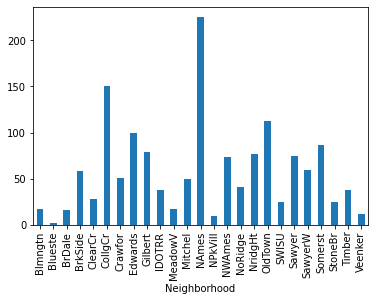

In [11]:
data.groupby(['Neighborhood'])['Neighborhood'].count().plot.bar()

In [12]:
data.groupby(['BsmtFinType2'])['BsmtFinType2'].count()

BsmtFinType2
ALQ      19
BLQ      33
GLQ      14
LwQ      46
Rec      54
Unf    1256
Name: BsmtFinType2, dtype: int64

In [13]:
data.isnull().mean().sort_values(ascending = True)

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
                   ...   
FireplaceQu      0.472603
Fence            0.807534
Alley            0.937671
MiscFeature      0.963014
PoolQC           0.995205
Length: 81, dtype: float64

In [14]:
data.isna().sum()[data.isna().sum()!=0]*100/data.shape[0]>80 # we can see above 80% missing columns as true

LotFrontage     False
Alley            True
MasVnrType      False
MasVnrArea      False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
Electrical      False
FireplaceQu     False
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageQual      False
GarageCond      False
PoolQC           True
Fence            True
MiscFeature      True
dtype: bool

In [15]:
data.isna().sum()[data.isna().sum()*100/data.shape[0]>80] # we can see here how many missing value more than 80%  

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [16]:
data.isna().sum()[data.isna().sum()*100/data.shape[0]>80].index

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [17]:
missing_colums = data.isna().sum()[data.isna().sum()*100/data.shape[0]>80].index  #taking morthan 80% missing column in to variable

In [18]:
data = data.drop(missing_colums,axis=1)  # removing morthan 80% missing column

In [19]:
data.shape

(1460, 77)

In [20]:
data.isna().sum()[data.isna().sum()>0]  # we can see here total missing values column

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [21]:
percentage_of_missing_values = [i for i in data.columns if data[i].isnull().sum()>1]

In [22]:
for i in percentage_of_missing_values:
  print(i,np.round(data[i].isnull().mean(),4),'%missing values')

LotFrontage 0.1774 %missing values
MasVnrType 0.0055 %missing values
MasVnrArea 0.0055 %missing values
BsmtQual 0.0253 %missing values
BsmtCond 0.0253 %missing values
BsmtExposure 0.026 %missing values
BsmtFinType1 0.0253 %missing values
BsmtFinType2 0.026 %missing values
FireplaceQu 0.4726 %missing values
GarageType 0.0555 %missing values
GarageYrBlt 0.0555 %missing values
GarageFinish 0.0555 %missing values
GarageQual 0.0555 %missing values
GarageCond 0.0555 %missing values


In [23]:
percentage_of_missing_values_new = data.isna().sum()[data.isna().sum()!=0]*100/len(data)

In [24]:
percentage_of_missing_values_new

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [25]:
num = [i for i in data.columns if data[i].dtypes!='O']

In [26]:
len(num)

38

In [27]:
data[num].head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500


In [28]:
obj = [i for i in data.columns if data[i].dtypes=='O']

In [29]:
len(obj)

39

In [30]:
data[obj].head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [31]:
Year_feature = [i for i in num if 'Yr' in i or 'Year' in i]

In [32]:
Year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [33]:
for i in Year_feature:
  print(i,data[i].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0, 0.5, 'Median House Price')

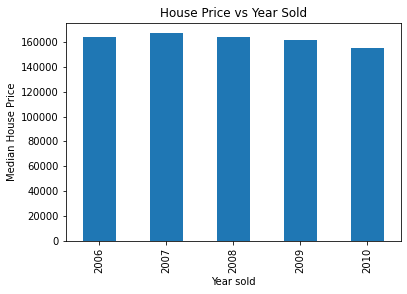

In [34]:
data.groupby('YrSold')['SalePrice'].median().plot.bar()
plt.title('House Price vs Year Sold')
plt.xlabel('Year sold')
plt.ylabel('Median House Price')

Text(0, 0.5, 'Median House Price')

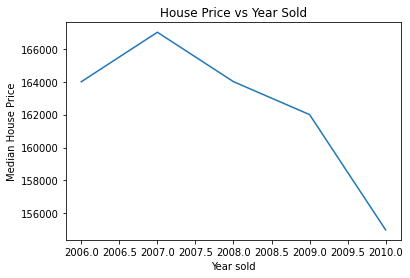

In [35]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.title('House Price vs Year Sold')
plt.xlabel('Year sold')
plt.ylabel('Median House Price')

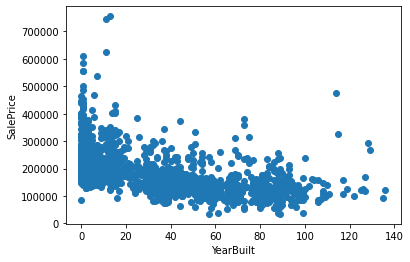

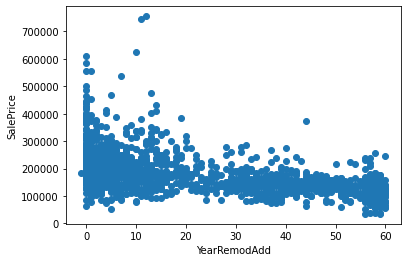

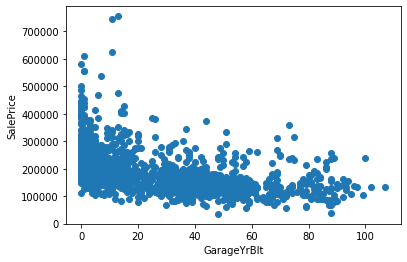

In [36]:
for i in Year_feature:
  if i !='YrSold':
    data[i]= data['YrSold']- data[i]
    plt.scatter(data[i],data['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

In [37]:
discreate_values = [ i for i in num if len(data[i].unique())<25 and i not in Year_feature+['Id']]

In [38]:
len(discreate_values)

17

In [39]:
data[discreate_values].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


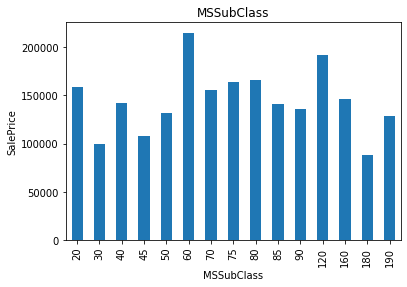

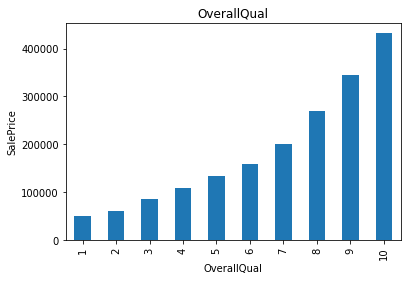

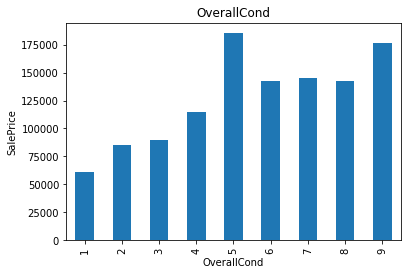

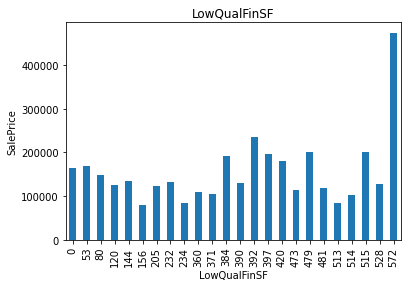

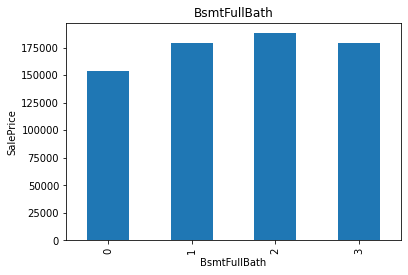

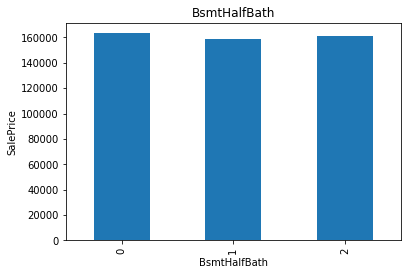

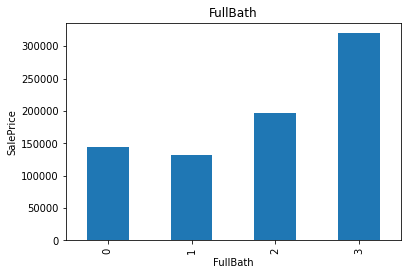

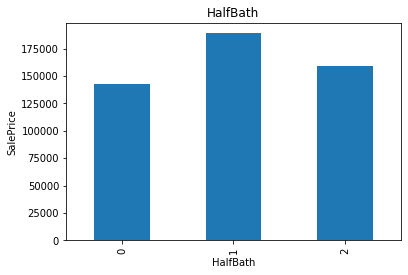

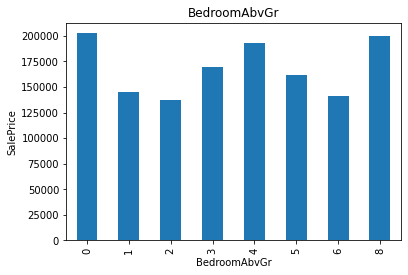

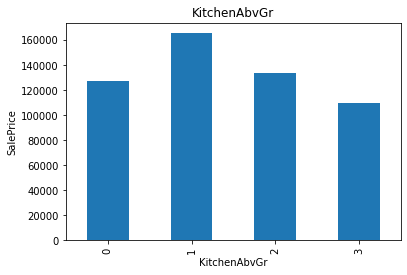

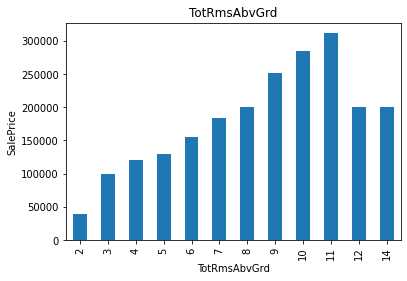

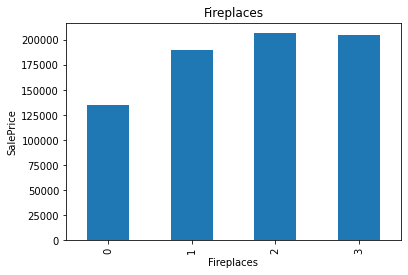

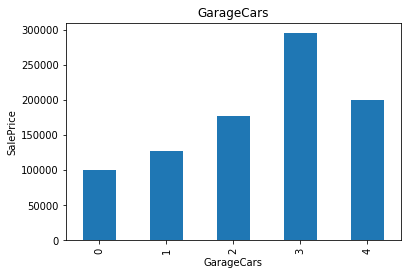

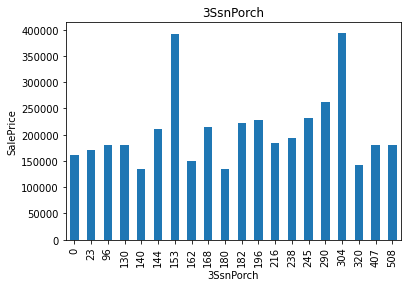

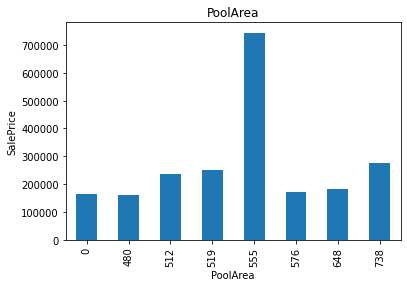

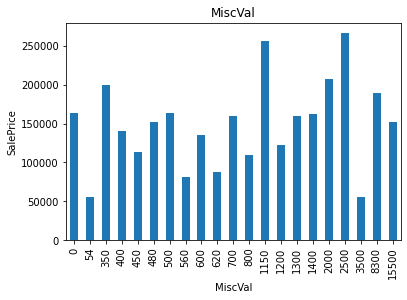

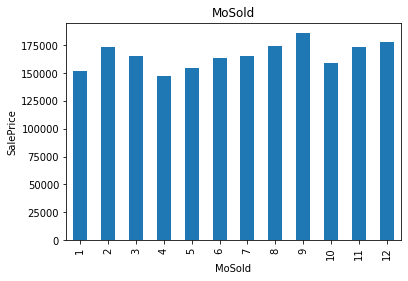

In [40]:
for i in discreate_values:
  data.groupby(i)['SalePrice'].median().plot.bar()
  plt.title(i)
  plt.xlabel(i)
  plt.ylabel('SalePrice')
  plt.show()

In [41]:
countiues_values = [i for i in num  if i not in discreate_values + Year_feature+['Id']]
countiues_values

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [42]:
len(countiues_values)

16

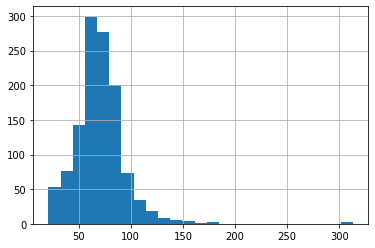

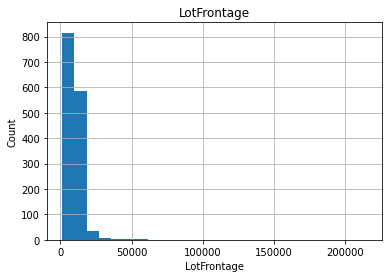

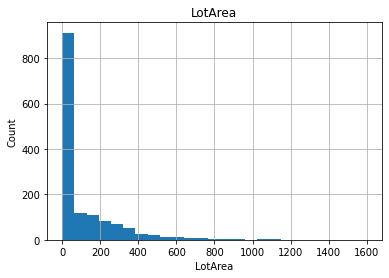

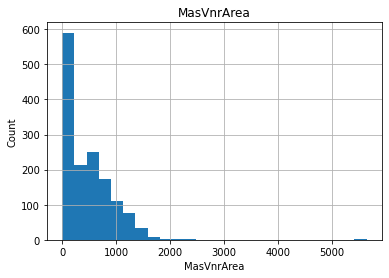

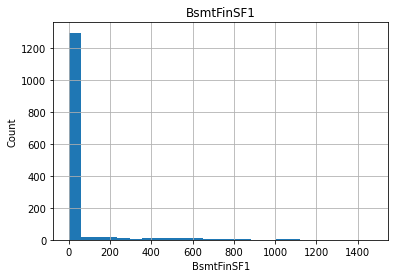

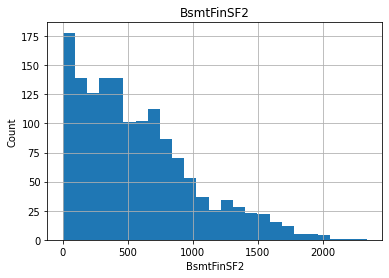

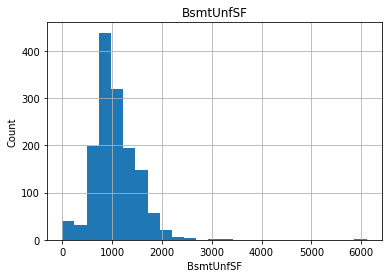

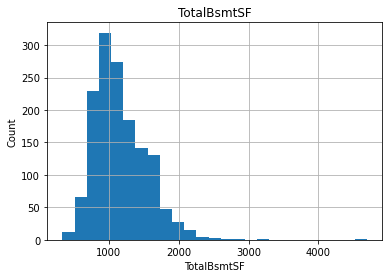

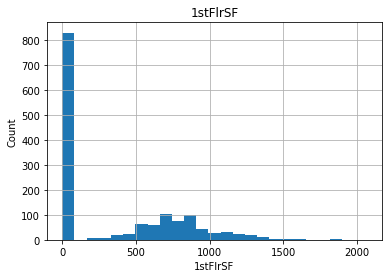

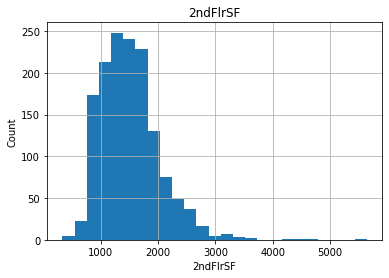

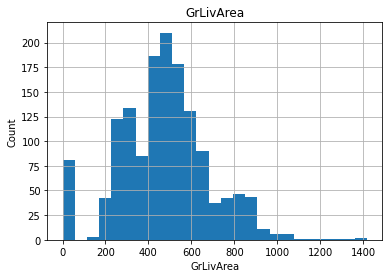

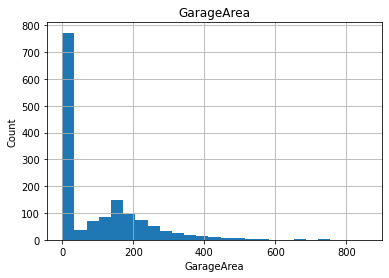

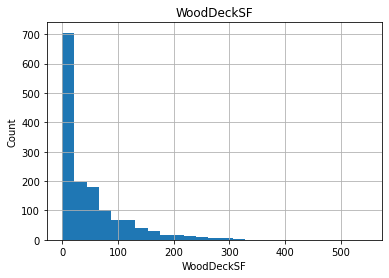

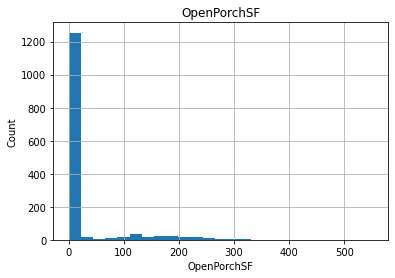

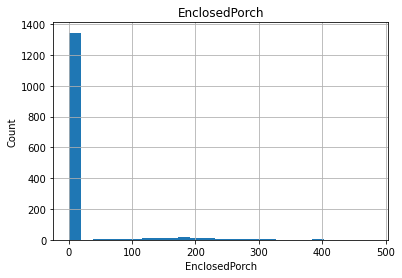

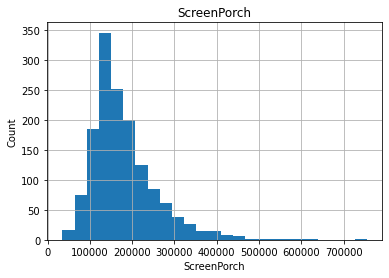

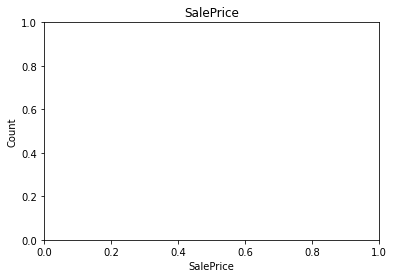

In [43]:
for i in countiues_values:
  data[i].hist(bins=25)
  plt.show()
  plt.ylabel("Count")
  plt.xlabel(i)
  plt.title(i)

In [44]:
# for i in countiues_values:
#   if 0 in data[i].unique():
#       pass
#   else:
#     data[i] = np.log(data[i])
#     # data['SalePrice'] = np.log(data['SalePrice'])
#     plt.scatter(data[i],data['SalePrice'])
#     plt.xlabel(i)
#     plt.ylabel('SalePrice')
#     plt.title(i)
#     plt.show()

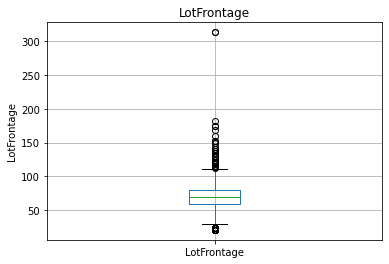

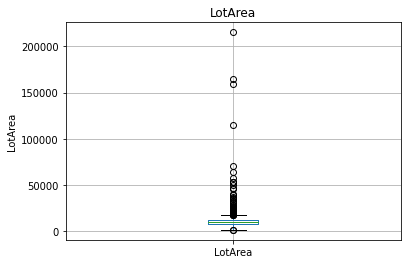

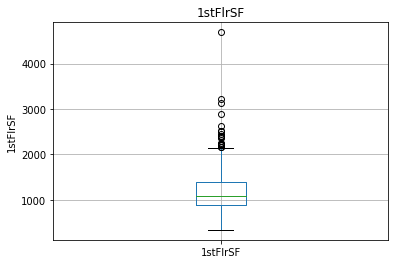

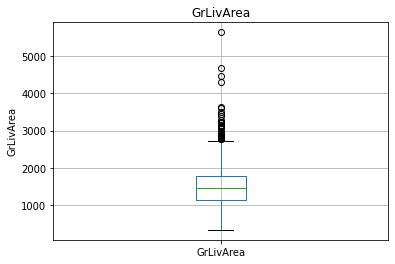

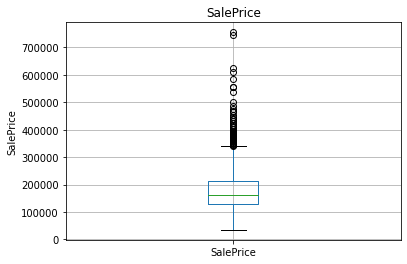

In [45]:
for i in countiues_values:
  if 0 in data[i].unique():
    pass
  else:
    # data[i]=np.log(data[i])
    data.boxplot(column=i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

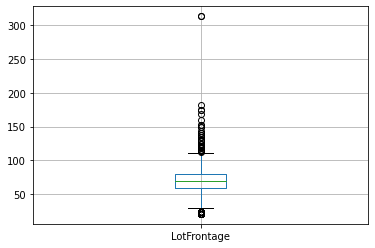

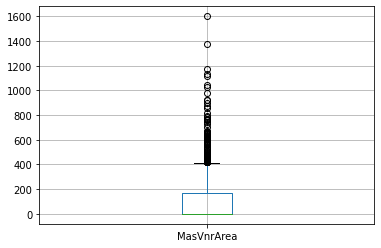

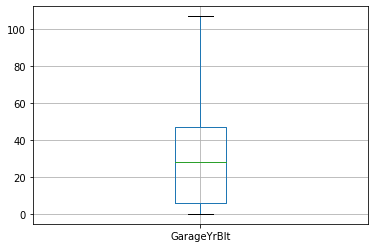

In [46]:
float_column = data.dtypes[data.dtypes=='float64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])

for x in float_column:
	desc = data[x].describe()
	IQR = desc['75%']- desc['25%']
	UT = desc['75%']+1.5*IQR
	LT = desc['25%']-1.5*IQR
	data[x][data[x]>UT] = UT
	data[x][data[x]<UT] = LT

In [47]:
data[obj].head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [48]:
for i in obj:
  print("feature is {} and number of the categories are {}".format(i,data[i].unique()))

feature is MSZoning and number of the categories are ['RL' 'RM' 'C (all)' 'FV' 'RH']
feature is Street and number of the categories are ['Pave' 'Grvl']
feature is LotShape and number of the categories are ['Reg' 'IR1' 'IR2' 'IR3']
feature is LandContour and number of the categories are ['Lvl' 'Bnk' 'Low' 'HLS']
feature is Utilities and number of the categories are ['AllPub' 'NoSeWa']
feature is LotConfig and number of the categories are ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
feature is LandSlope and number of the categories are ['Gtl' 'Mod' 'Sev']
feature is Neighborhood and number of the categories are ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
feature is Condition1 and number of the categories are ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
feature is Condit

In [49]:
for i in obj:
  print("feature is {} and number of the categories are {}".format(i,len(data[i].unique())))

feature is MSZoning and number of the categories are 5
feature is Street and number of the categories are 2
feature is LotShape and number of the categories are 4
feature is LandContour and number of the categories are 4
feature is Utilities and number of the categories are 2
feature is LotConfig and number of the categories are 5
feature is LandSlope and number of the categories are 3
feature is Neighborhood and number of the categories are 25
feature is Condition1 and number of the categories are 9
feature is Condition2 and number of the categories are 8
feature is BldgType and number of the categories are 5
feature is HouseStyle and number of the categories are 8
feature is RoofStyle and number of the categories are 6
feature is RoofMatl and number of the categories are 8
feature is Exterior1st and number of the categories are 15
feature is Exterior2nd and number of the categories are 16
feature is MasVnrType and number of the categories are 5
feature is ExterQual and number of the 

In [50]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,27.5,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,-249.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,-55.5,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,27.5,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,-249.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,-55.5,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [51]:
data['SalePrice'].head(10)

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

In [52]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,27.5,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,-249.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,-55.5,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,27.5,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,-249.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,-55.5,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [53]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,27.5,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,-249.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,-55.5,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,27.5,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,-249.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,-55.5,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [54]:
def correlation(data, threshold):                                  # FINDING HIGHLY COREELATION OF EACH COLUMN
  col_corr = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr


In [55]:
corr_features = correlation(data,0.85)

In [56]:
len(set(corr_features))

1

In [57]:
corr_features

{'GarageArea'}

In [58]:
data.drop(['GarageArea','Id','GrLivArea','LotArea'],axis=1,inplace=True)

In [59]:
data.shape

(1460, 73)

In [60]:
Missing_value_object_col = data[data.dtypes[data.dtypes==object].index].isnull().sum()[(data.isna().sum()!=0)].index
Missing_value_object_col

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [61]:
for x in Missing_value_object_col:
  data[x][data[x].isna()]= data[x].mode()[0]

In [62]:
Missing_value_numeric_col = data[data.dtypes[data.dtypes=='float64'].index].isnull().sum()[(data.isna().sum()!=0)].index
Missing_value_numeric_col

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [63]:
for x in Missing_value_numeric_col:
  data[x][data[x].isna()]= data[x].mean()

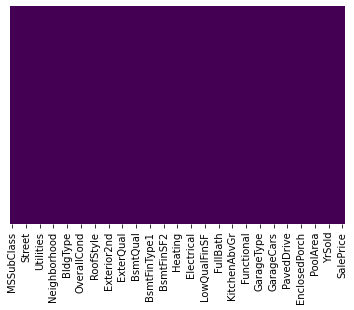

In [64]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [65]:
data.isnull().sum().sum()

0

In [66]:
data.head(5)

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,27.5,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,-249.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,-55.5,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,27.5,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,-249.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,-55.5,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,27.5,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,-249.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,-55.5,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,27.5,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,-249.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,-55.5,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,27.5,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,-249.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,-55.5,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [67]:
data.GarageYrBlt.isnull().sum()

0

In [68]:
data.GarageYrBlt.dtypes

dtype('float64')

In [69]:
data = pd.get_dummies(data,drop_first=True)

In [70]:
data.head(2)

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,27.5,7,5,5,5,-249.0,706,0,150,856,856,854,0,1,0,2,1,3,1,8,0,-55.5,2,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,27.5,6,8,31,31,-249.0,978,0,284,1262,1262,0,0,0,1,2,0,3,1,6,1,-55.5,2,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [71]:
data.shape

(1460, 234)

In [72]:
# cm = data.corr()
# ax=sns.heatmap(cm,vmin=1,vmax=1)
# ax.plot()


In [73]:
x = data.drop("SalePrice",axis=1)

In [74]:
x.shape

(1460, 233)

In [75]:
y = data[['SalePrice']]

In [76]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [77]:
# stdsclr = StandardScaler()


In [78]:
# X= stdsclr.fit_transform(x)

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25,random_state =0)

In [91]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((1095, 233), (365, 233), (1095, 1), (365, 1))

In [80]:
feature_selection_model = SelectFromModel(Lasso(alpha=0.05,random_state=0))

In [81]:
Result = feature_selection_model.fit(x_train,y_train)
Result

SelectFromModel(estimator=Lasso(alpha=0.05, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [82]:
feature_selection_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [83]:
selected_features = x_train.columns[(feature_selection_model.get_support())]
selected_features

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=227)

In [86]:
print('Total Featurs:{}'.format(x_train.shape[1]))
print('Selected Features: {}' .format(len(selected_features)))

Total Featurs:233
Selected Features: 227


In [87]:
x_train[selected_features].head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1292,70,27.500000,5,4,117,44,-249.0,0,0,994,994,1378,994,0,0,0,2,0,4,2,11,0,1,0,287,0,0,0,0,0,12,2009,0,0,0,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1018,80,30.717319,7,5,16,15,-249.0,0,0,384,384,802,670,0,0,0,2,1,3,1,7,1,2,164,0,0,0,0,0,0,5,2007,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1213,80,30.717319,4,9,41,5,-249.0,648,0,0,648,960,0,0,1,1,0,0,0,1,3,0,1,88,0,0,0,0,0,0,5,2006,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1430,60,27.500000,5,5,1,1,-249.0,0,0,732,732,734,1104,0,0,0,2,1,4,1,7,1,2,100,40,0,0,0,0,0,7,2006,0,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
810,20,27.500000,6,6,32,7,-249.0,663,377,0,1040,1309,0,0,1,0,1,1,3,1,5,1,2,265,0,0,0,0,648,0,1,2006,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [99]:
x_train[selected_features].shape

(1095, 227)

In [102]:
X.shape

(1095, 227)